In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,WVGUNPE28M,Kitsap,Olalla,WA,98359.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
4,1FADP5CU9G,Thurston,Olympia,WA,98506.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df= df[df['Base MSRP'] != 0]

In [4]:
import numpy as np

<Axes: title={'center': 'Price Comparison'}, xlabel='Make', ylabel='Price'>

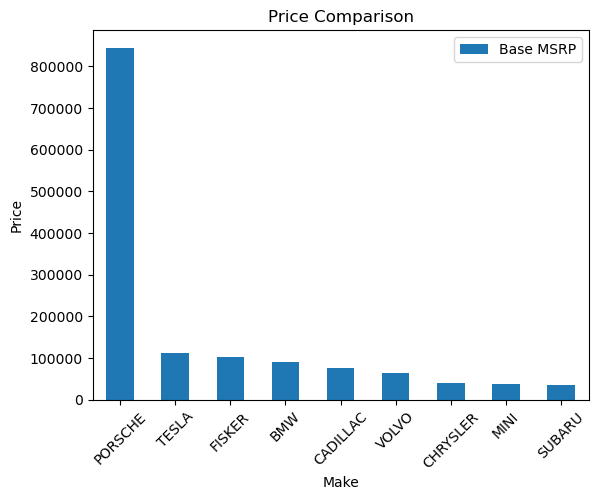

In [5]:
group_df = df.groupby('Make', dropna=True).agg({'Base MSRP':'max'}).reset_index('Make').sort_values(by='Base MSRP', ascending=False)
top_10_MSRP = group_df[:9]


top_10_MSRP.plot(kind='bar', x='Make', ylabel='Price', rot= 45, title='Price Comparison')



In [69]:
df[df['Model'] == 'MODEL S']['Electric Range']


132       208.0
252       265.0
586       208.0
971       265.0
1017      265.0
          ...  
215769    208.0
216266    208.0
216434    208.0
216588    208.0
216666    208.0
Name: Electric Range, Length: 1468, dtype: float64

In [ ]:
make_means = df.groupby('Make')['Electric Range'].max()
# # Fill 0s in 'Electric Range' with the corresponding make mean
df['Electric Range'] = df.apply(
     lambda row: make_means[row['Make']] if row['Electric Range'] == 0 else row['Electric Range'],
    axis=1
)


In [ ]:
df.select_dtypes('float')
df

,Postal Code,Electric Range,Base MSRP,Legislative District,2020 Census Tract
0,98177.0,75.0,0.0,32.0,5.303302e+10
1,98112.0,270.0,0.0,43.0,5.303301e+10
2,98359.0,0.0,0.0,26.0,5.303509e+10
3,98501.0,25.0,0.0,22.0,5.306701e+10
4,98506.0,19.0,0.0,22.0,5.306701e+10
...,...,...,...,...,...
216767,98802.0,38.0,0.0,12.0,5.301795e+10
216768,98229.0,33.0,0.0,40.0,5.307300e+10
216769,98052.0,0.0,0.0,48.0,5.303303e+10
216770,98329.0,38.0,0.0,26.0,5.305307e+10


In [ ]:
pivot4 = df.pivot_table(
    index='State', 
    columns='', 
    values='VIN (1-10)', 
    aggfunc='count', 
    fill_value=0  # Fill NaN with 0
)

print(pivot4)



Legislative District  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
State                                                                        
WA                    9358  2578  1123  1980  9206  2203  1062  2301  1268   

Legislative District  10.0  ...  40.0   41.0  42.0  43.0  44.0   45.0  46.0  \
State                       ...                                               
WA                    3799  ...  4505  13581  3074  7559  5951  12536  8077   

Legislative District  47.0   48.0  49.0  
State                                    
WA                    4110  11692  3086  

[1 rows x 49 columns]


In [15]:
#df_grouped = df.groupby(['Make', 'Electric Vehicle Type'])['VIN (1-10)'].count().reset_index()
df_grouped = df.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count').sort_values(by = 'Count', ascending= False)

df_grouped


,Make,Electric Vehicle Type,Count
53,TESLA,Battery Electric Vehicle (BEV),93931
43,NISSAN,Battery Electric Vehicle (BEV),15011
10,CHEVROLET,Battery Electric Vehicle (BEV),11054
17,FORD,Battery Electric Vehicle (BEV),7778
56,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),7425
...,...,...,...
49,ROLLS-ROYCE,Battery Electric Vehicle (BEV),3
61,WHEEGO ELECTRIC CARS,Plug-in Hybrid Electric Vehicle (PHEV),3
47,RAM,Battery Electric Vehicle (BEV),2
29,LAMBORGHINI,Plug-in Hybrid Electric Vehicle (PHEV),1


In [127]:
pivoted = df.pivot(columns='Make', values='Electric Range')
pivoted[pivoted['TESLA'].notna()]['TESLA'].sort_values(ascending=False).head(20)
pivoted.dropna()



Make,ACURA,ALFA ROMEO,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,DODGE,...,ROLLS-ROYCE,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VINFAST,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS


In [85]:
df['State'].value_counts()
df[df['State'] == 'WA']['City'].value_counts()
df[df['City'] == 'Seattle']['Make'].value_counts()

TESLA             13083
NISSAN             2850
CHEVROLET          2717
BMW                1838
KIA                1702
VOLVO              1505
FORD               1469
TOYOTA             1468
HYUNDAI            1398
VOLKSWAGEN         1389
RIVIAN             1119
AUDI               1011
JEEP                378
CHRYSLER            338
MINI                333
MERCEDES-BENZ       325
POLESTAR            324
FIAT                223
PORSCHE             214
HONDA               195
SUBARU              149
MITSUBISHI          136
LEXUS               102
MAZDA                95
CADILLAC             92
LUCID                66
SMART                51
GENESIS              49
JAGUAR               32
FISKER               26
LINCOLN              17
ALFA ROMEO           17
LAND ROVER           15
DODGE                11
ACURA                 7
GMC                   7
AZURE DYNAMICS        2
BENTLEY               1
Name: Make, dtype: int64

In [94]:
df.groupby(['Make','Model'])['Electric Range'].max().sort_values(ascending= False)

Make         Model   
TESLA        MODEL S     337.0
             MODEL 3     322.0
             MODEL X     293.0
             MODEL Y     291.0
CHEVROLET    BOLT EV     259.0
                         ...  
CADILLAC     LYRIQ         0.0
NISSAN       ARIYA         0.0
ACURA        ZDX           0.0
LAMBORGHINI  REVUELTO      NaN
PORSCHE      MACAN         NaN
Name: Electric Range, Length: 155, dtype: float64

In [100]:
df[df['Model Year'] == df['Model Year'].min()]
current_year_df = df[df['Model Year'] == df['Model Year'].max()]
current_year_df['Make'].value_counts()

RIVIAN        444
BMW           312
NISSAN        139
VOLVO         139
KIA           109
LEXUS          74
MAZDA          72
HYUNDAI        47
PORSCHE        24
MINI           21
LAND ROVER     21
GMC            20
GENESIS         4
CHEVROLET       2
Name: Make, dtype: int64

In [78]:
df.loc[df['Electric Range'].isnull(),'Electric Range']
new_df = df.interpolate()
new_df.isnull().sum()






VIN (1-10)                                            0
County                                                5
City                                                  5
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                     11
Electric Utility                                      5
2020 Census Tract                                     0
dtype: int64

In [48]:
df[df['Make'] == 'TESLA']['Model'].value_counts()

MODEL Y       45231
MODEL 3       33630
MODEL S        7858
MODEL X        6302
CYBERTRUCK      859
ROADSTER         51
Name: Model, dtype: int64

In [ ]:

df[df['Make'] == 'TESLA'].groupby('Model')['Base MSRP'].sum()


C:\Users\binch\AppData\Local\Temp\ipykernel_12364\443656720.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Make'] == 'TESLA'].groupby('Model').mean()


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Model,,,,,,,
CYBERTRUCK,98301.864959,2024.000000,0.000000,0.000000,28.052386,2.692612e+08,5.303945e+10
MODEL 3,98141.362574,2021.025037,97.439280,0.000000,29.754934,2.336303e+08,5.296643e+10
MODEL S,98146.376686,2017.553830,172.255281,12895.545940,29.934133,2.114648e+08,5.295261e+10
MODEL X,98135.939851,2020.261822,126.312440,0.000000,30.430207,2.254707e+08,5.300465e+10
MODEL Y,98140.144395,2022.610975,14.559329,0.000000,29.301420,2.290512e+08,5.297413e+10
ROADSTER,98196.705882,2009.235294,229.411765,103330.392157,28.745098,1.813988e+08,5.303975e+10


In [62]:
Tesla_df = df[df['Make'] == 'TESLA']
Tesla_df.loc[(Tesla_df['Electric Range'] == 0) | (Tesla_df['Base MSRP'] ==0 )]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
5,5YJ3E1EA9L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,1.0,127104078,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
6,5YJSA1E26J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,1.0,104605490,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
10,5YJ3E1EBXL,Kitsap,Bainbridge Island,WA,98110.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,23.0,104355884,POINT (-122.521 47.62728),PUGET SOUND ENERGY INC,5.303509e+10
15,5YJXCAE20J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,1.0,273626384,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,5YJ3E1EB5N,King,Redmond,WA,98053.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,192923517,POINT (-122.03287 47.68555),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
216761,5YJYGDEF6M,Pierce,Sumner,WA,98390.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,224771347,POINT (-122.23972 47.2022),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
216763,5YJ3E1EA6K,Lewis,Winlock,WA,98596.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,19.0,328494099,POINT (-122.93881 46.49114),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10
216769,7SAYGAEE9R,King,Redmond,WA,98052.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,274988388,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
df[].groupby(('Make'))

In [3]:
num = 0
for col in df.columns:
    print(f"column{num}:", col)
    num+=1

column0: VIN (1-10)
column1: County
column2: City
column3: State
column4: Postal Code
column5: Model Year
column6: Make
column7: Model
column8: Electric Vehicle Type
column9: Clean Alternative Fuel Vehicle (CAFV) Eligibility
column10: Electric Range
column11: Base MSRP
column12: Legislative District
column13: DOL Vehicle ID
column14: Vehicle Location
column15: Electric Utility
column16: 2020 Census Tract


In [4]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,216767.000000,216772.000000,216753.000000,216753.000000,216321.000000,2.167720e+05,2.167670e+05
mean,98179.750714,2021.129039,49.428386,870.987045,28.920114,2.304479e+08,5.298157e+10
std,2458.320323,2.983918,86.224511,7544.671592,14.907934,7.044964e+07,1.514710e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,1.962328e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.440312e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.649070e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [5]:
sorted_df = df.sort_values(by= "Electric Range" ,ascending=False)
sorted_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
168553,5YJSA1E49L,King,Seattle,WA,98107.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,36.0,217997405,POINT (-122.38591 47.67597),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
97894,5YJSA1E41L,King,Seattle,WA,98177.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,32.0,117551388,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
21803,5YJSA1E48L,King,Tukwila,WA,98178.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,11.0,125903711,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
64930,5YJSA1E47L,Kitsap,Olalla,WA,98359.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,26.0,267504233,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
102949,5YJSA1E48L,King,Issaquah,WA,98029.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,5.0,244588711,POINT (-122.00292 47.54748),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [6]:
#loc is like a where cause in sql where you select .... where....
df.loc[df["Electric Range"]>20]


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJ3E1EA9L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,1.0,127104078,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
6,5YJSA1E26J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,1.0,104605490,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216765,2C4RC1H71K,Pierce,Lakewood,WA,98499.0,2019,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,39995.0,29.0,350302242,POINT (-122.51495 47.16196),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
216766,1G1FZ6S06L,Spokane,Spokane,WA,99212.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,4.0,121645282,POINT (-117.28805 47.68043),BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATI...,5.306301e+10
216767,1G1RB6E44D,Douglas,East Wenatchee,WA,98802.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,12.0,122822822,POINT (-120.29473 47.41515),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
216768,KNDCS3LF9R,Whatcom,Bellingham,WA,98229.0,2024,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,40.0,267143887,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [7]:
df_state_city = df.loc[df["Electric Range"] > 50, ["State", "City", "Electric Range"]]
df_state_city
print(f"number of City with Electric Ranfe greater than 50:{df_state_city.count()}")

number of City with Electric Ranfe greater than 50:State             50959
City              50957
Electric Range    50959
dtype: int64


In [8]:
df.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         216772 non-null  object 
 1   County                                             216767 non-null  object 
 2   City                                               216767 non-null  object 
 3   State                                              216772 non-null  object 
 4   Postal Code                                        216767 non-null  float64
 5   Model Year                                         216772 non-null  int64  
 6   Make                                               216772 non-null  object 
 7   Model                                              216772 non-null  object 
 8   Electric Vehicle Type                              216772 non-null  object

In [9]:
df.select_dtypes(include='number')

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98177.0,2013,75.0,0.0,32.0,125450447,5.303302e+10
1,98112.0,2019,270.0,0.0,43.0,101662900,5.303301e+10
2,98359.0,2021,0.0,0.0,26.0,272118717,5.303509e+10
3,98501.0,2017,25.0,0.0,22.0,349372929,5.306701e+10
4,98506.0,2016,19.0,0.0,22.0,171625653,5.306701e+10
...,...,...,...,...,...,...,...
216767,98802.0,2013,38.0,0.0,12.0,122822822,5.301795e+10
216768,98229.0,2024,33.0,0.0,40.0,267143887,5.307300e+10
216769,98052.0,2024,0.0,0.0,48.0,274988388,5.303303e+10
216770,98329.0,2013,38.0,0.0,26.0,117353064,5.305307e+10


In [10]:
df.axes

[RangeIndex(start=0, stop=216772, step=1),
 Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
        'Make', 'Model', 'Electric Vehicle Type',
        'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
        'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
        'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
       dtype='object')]

In [11]:
df_row, df_col= df.shape
print(df.shape)
print("rows:", df_row)
print("columns", df_col)

(216772, 17)
rows: 216772
columns 17


In [12]:
print(df[df.isnull().any(axis=1)])


        VIN (1-10)          County               City State  Postal Code  \
175     WBAJA9C50K             NaN                NaN    AE          NaN   
183     5YJXCAE24H             NaN                NaN    BC          NaN   
186     1G1RB6S53J             NaN                NaN    BC          NaN   
8587    WP1AA2XA9R          Kitsap  Bainbridge Island    WA      98110.0   
8591    WP1AA2XA9R            King            Seattle    WA      98112.0   
...            ...             ...                ...   ...          ...   
214712  2C4RC1S72M         El Paso   Colorado Springs    CO      80919.0   
214960  5YJYGDEF2M    Contra Costa          Lafayette    CA      94549.0   
215514  KNDPZDAH9P  Prince William         Woodbridge    VA      22191.0   
215750  WB523CF01N         Alameda            Fremont    CA      94538.0   
216244  KMHE54L2XH         Pacific         Long Beach    WA      98634.0   

        Model Year       Make     Model  \
175           2019        BMW      530E   
1

In [13]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        19
Base MSRP                                             19
Legislative District                                 451
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [14]:
df.isnull().any()

VIN (1-10)                                           False
County                                                True
City                                                  True
State                                                False
Postal Code                                           True
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Electric Range                                        True
Base MSRP                                             True
Legislative District                                  True
DOL Vehicle ID                                       False
Vehicle Location                                      True
Electric Utility                                      True
2020 Census Tract                                     Tr

In [15]:
df_copy = df.copy()
df_copy = df.dropna(subset=['Legislative District', 'County','City','Postal Code'])
df_copy.isnull().sum()

VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                       19
Base MSRP                                            19
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                      6
Electric Utility                                      0
2020 Census Tract                                     0
dtype: int64

In [17]:
makers_ctg = df["Make"].value_counts()
print("number of makes: ",makers_ctg.count())
top_10_makes = makers_ctg[:9]
print("top 10 makes:\n ", top_10_makes)


number of makes:  44
top 10 makes:
  TESLA        93931
CHEVROLET    15864
NISSAN       15011
FORD         11486
KIA          10090
BMW           8820
TOYOTA        8543
HYUNDAI       6304
RIVIAN        6113
Name: Make, dtype: int64


In [18]:
import matplotlib.pyplot as plt
count = (df['Electric Range'] > 0).sum()
df.loc[df['Electric Range'] > 0]
count


92652

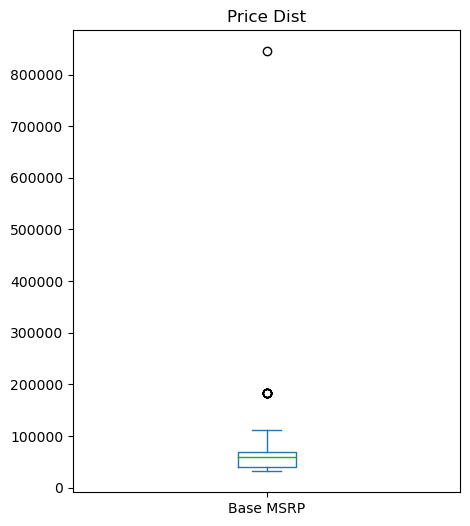

In [ ]:

ax = df.loc[df["Base MSRP"]>0,"Base MSRP"].plot(kind='box',title="Price Dist", figsize=(5,6),)

plt.show()

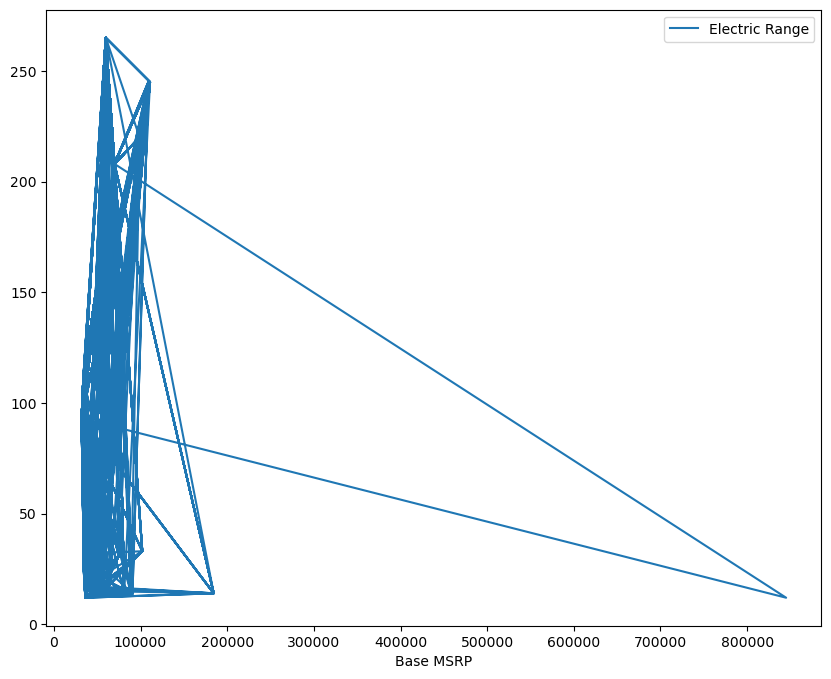

In [43]:
df_exclude_zero = df.loc[(df['Electric Range'] >0) & (df['Base MSRP']>0)]
df_exclude_zero.plot(x='Base MSRP',y='Electric Range',kind= 'line', figsize=(10,8))
plt.show()


In [107]:
df['Electric Range']

0          75.0
1         270.0
2           0.0
3          25.0
4          19.0
          ...  
216767     38.0
216768     33.0
216769      0.0
216770     38.0
216771      0.0
Name: Electric Range, Length: 216772, dtype: float64

In [99]:
df.loc[df['Electric Range'] > 0].boxplot(column='Electric Range') 
plt.show()

KeyError: 'Electric Range'

In [95]:
import numpy as np